# Importar


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ler 

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/UME_ANALISE/sample15k_synth.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv(path)
data.head()

,date,demo1,demo2,demo3,demo4,demo5,demo6,job1,job2,job3,job4,income1,income2,debt1,debt2,debt3,target
0,2015-08-25,18,-1,1,4,12,1,0,0,19,2,0,1034.5000,-1,0,NaN,0
1,2015-08-12,24,1,1,4,60,1,1,0,0,2,0,1344.8500,0,0,0.8218,0
2,2015-08-08,41,1,1,3,98,1,1,0,0,4,0,2275.9000,2,0,0.9558,1
3,2015-08-14,30,0,1,5,108,1,0,0,30,2,0,1344.8500,5,0,0.9304,0
4,2015-08-28,18,-1,1,4,120,1,0,0,0,4,0,1008.6375,-1,0,NaN,0


# Explorar Dados

##Verificar Valores Nulos e preencher


 Numero de Dados Faltantes >>> 454


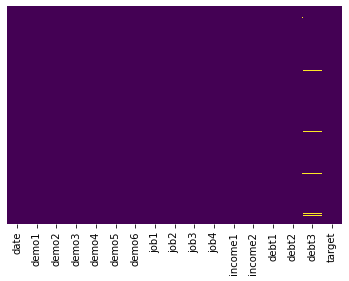

In [4]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print("\n Numero de Dados Faltantes >>>",data['debt3'].isnull().sum().sum())

In [5]:
# Existe valores Nulos na coluna debt3 cujo 'target' == 1 ?
data['debt3'].loc[data['target']==1].isnull().sum()

141

* Valores Nulos preenchidos com a Mediana do respectivo atributo somente se o 'target' do evento for 1

In [6]:
mediana = data['debt3'].median()
data['debt3'].loc[data['target']==1].isnull().replace(np.nan, mediana) 
#data['debt3'] = data['debt3'].replace(np.nan, mediana) 
data.head()

,date,demo1,demo2,demo3,demo4,demo5,demo6,job1,job2,job3,job4,income1,income2,debt1,debt2,debt3,target
0,2015-08-25,18,-1,1,4,12,1,0,0,19,2,0,1034.5000,-1,0,NaN,0
1,2015-08-12,24,1,1,4,60,1,1,0,0,2,0,1344.8500,0,0,0.8218,0
2,2015-08-08,41,1,1,3,98,1,1,0,0,4,0,2275.9000,2,0,0.9558,1
3,2015-08-14,30,0,1,5,108,1,0,0,30,2,0,1344.8500,5,0,0.9304,0
4,2015-08-28,18,-1,1,4,120,1,0,0,0,4,0,1008.6375,-1,0,NaN,0


* Removendo eventos cujo 'debt3' é nulo target == 0

In [7]:
data.dropna(inplace=True)


 Numero de Dados Faltantes >>> 0


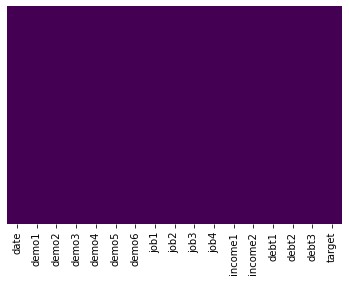

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print("\n Numero de Dados Faltantes >>>",data['debt3'].isnull().sum())

##Discretizando Dados

* Discretização dos Atributos

In [9]:
data.describe()

,demo1,demo2,demo3,demo4,demo5,demo6,job1,job2,job3,job4,income1,income2,debt1,debt2,debt3,target
count,14546.000000,14546.000000,14546.000000,14546.000000,14546.000000,14546.000000,14546.000000,14546.000000,14546.000000,14546.000000,14546.000000,1.454600e+04,14546.000000,14546.000000,14546.000000,14546.000000
mean,36.071841,0.343187,1.802832,3.165613,135.939227,1.305651,0.426853,0.045098,46.719236,3.262615,0.087172,2.109937e+03,2.883679,0.108415,0.844932,0.178056
std,13.353928,0.554541,1.272458,1.357663,131.518459,0.747222,0.494638,0.207527,69.771649,1.782401,0.282096,8.807096e+03,1.836515,0.310914,0.078211,0.382573
min,18.000000,-1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.034600e+02,-1.000000,0.000000,0.142300,0.000000
25%,25.000000,0.000000,1.000000,2.000000,36.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.241400e+03,2.000000,0.000000,0.801900,0.000000
50%,34.000000,0.000000,1.000000,4.000000,108.000000,1.000000,0.000000,0.000000,19.000000,2.000000,0.000000,1.551750e+03,3.000000,0.000000,0.850600,0.000000
75%,45.000000,1.000000,2.000000,4.000000,216.000000,1.000000,1.000000,0.000000,55.000000,4.000000,0.000000,2.275900e+03,4.000000,0.000000,0.901900,0.000000
max,80.000000,1.000000,7.000000,5.000000,2520.000000,5.000000,1.000000,1.000000,722.000000,9.000000,1.000000,1.018982e+06,5.000000,1.000000,0.999000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


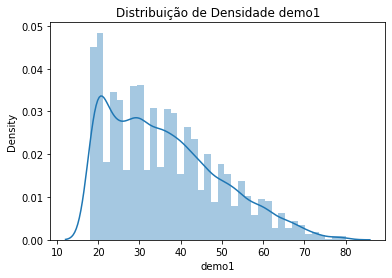

In [10]:
sns.distplot(data['demo1'], kde=True)
plt.title('Distribuição de Densidade demo1')
plt.show()

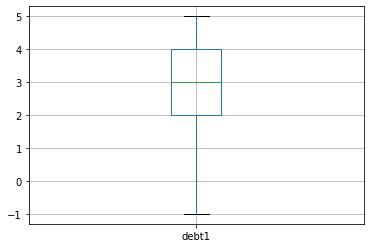

In [11]:
data.boxplot(column=['debt1'])

In [12]:
import plotly.express as px
dados = data.copy()
dados.head()
fig = px.scatter(dados, x="demo1", y="job3", color="target",size='debt3')#, hover_data=['current_votes'])
fig.show()

## Analisar Correlação de Atributos

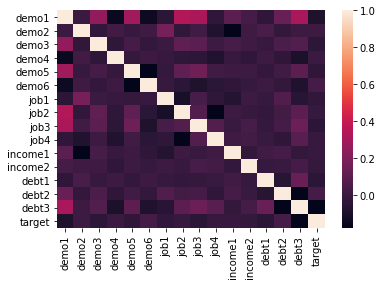

In [13]:
#Correlação tendo referencia quartis
sns.heatmap(data.corr(),robust=True)

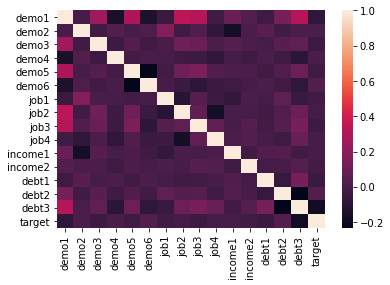

In [14]:
#Correlação tendo referencia Amplitude
sns.heatmap(data.corr(),robust=False)

* Correlação entre todas os atributos entre si

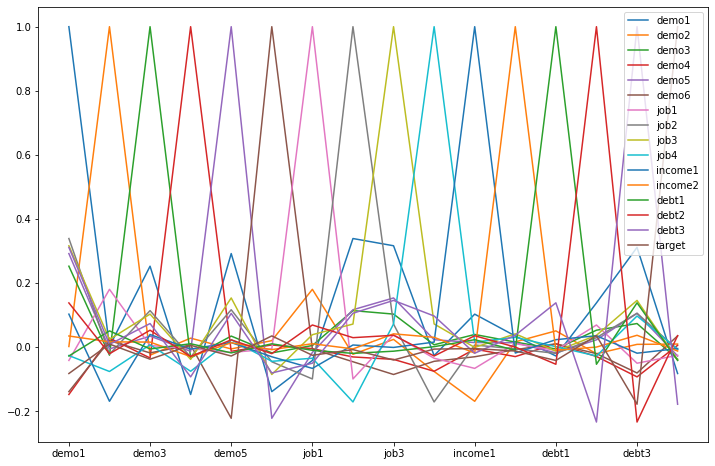

In [15]:
data.corr().plot(figsize=(12,8))

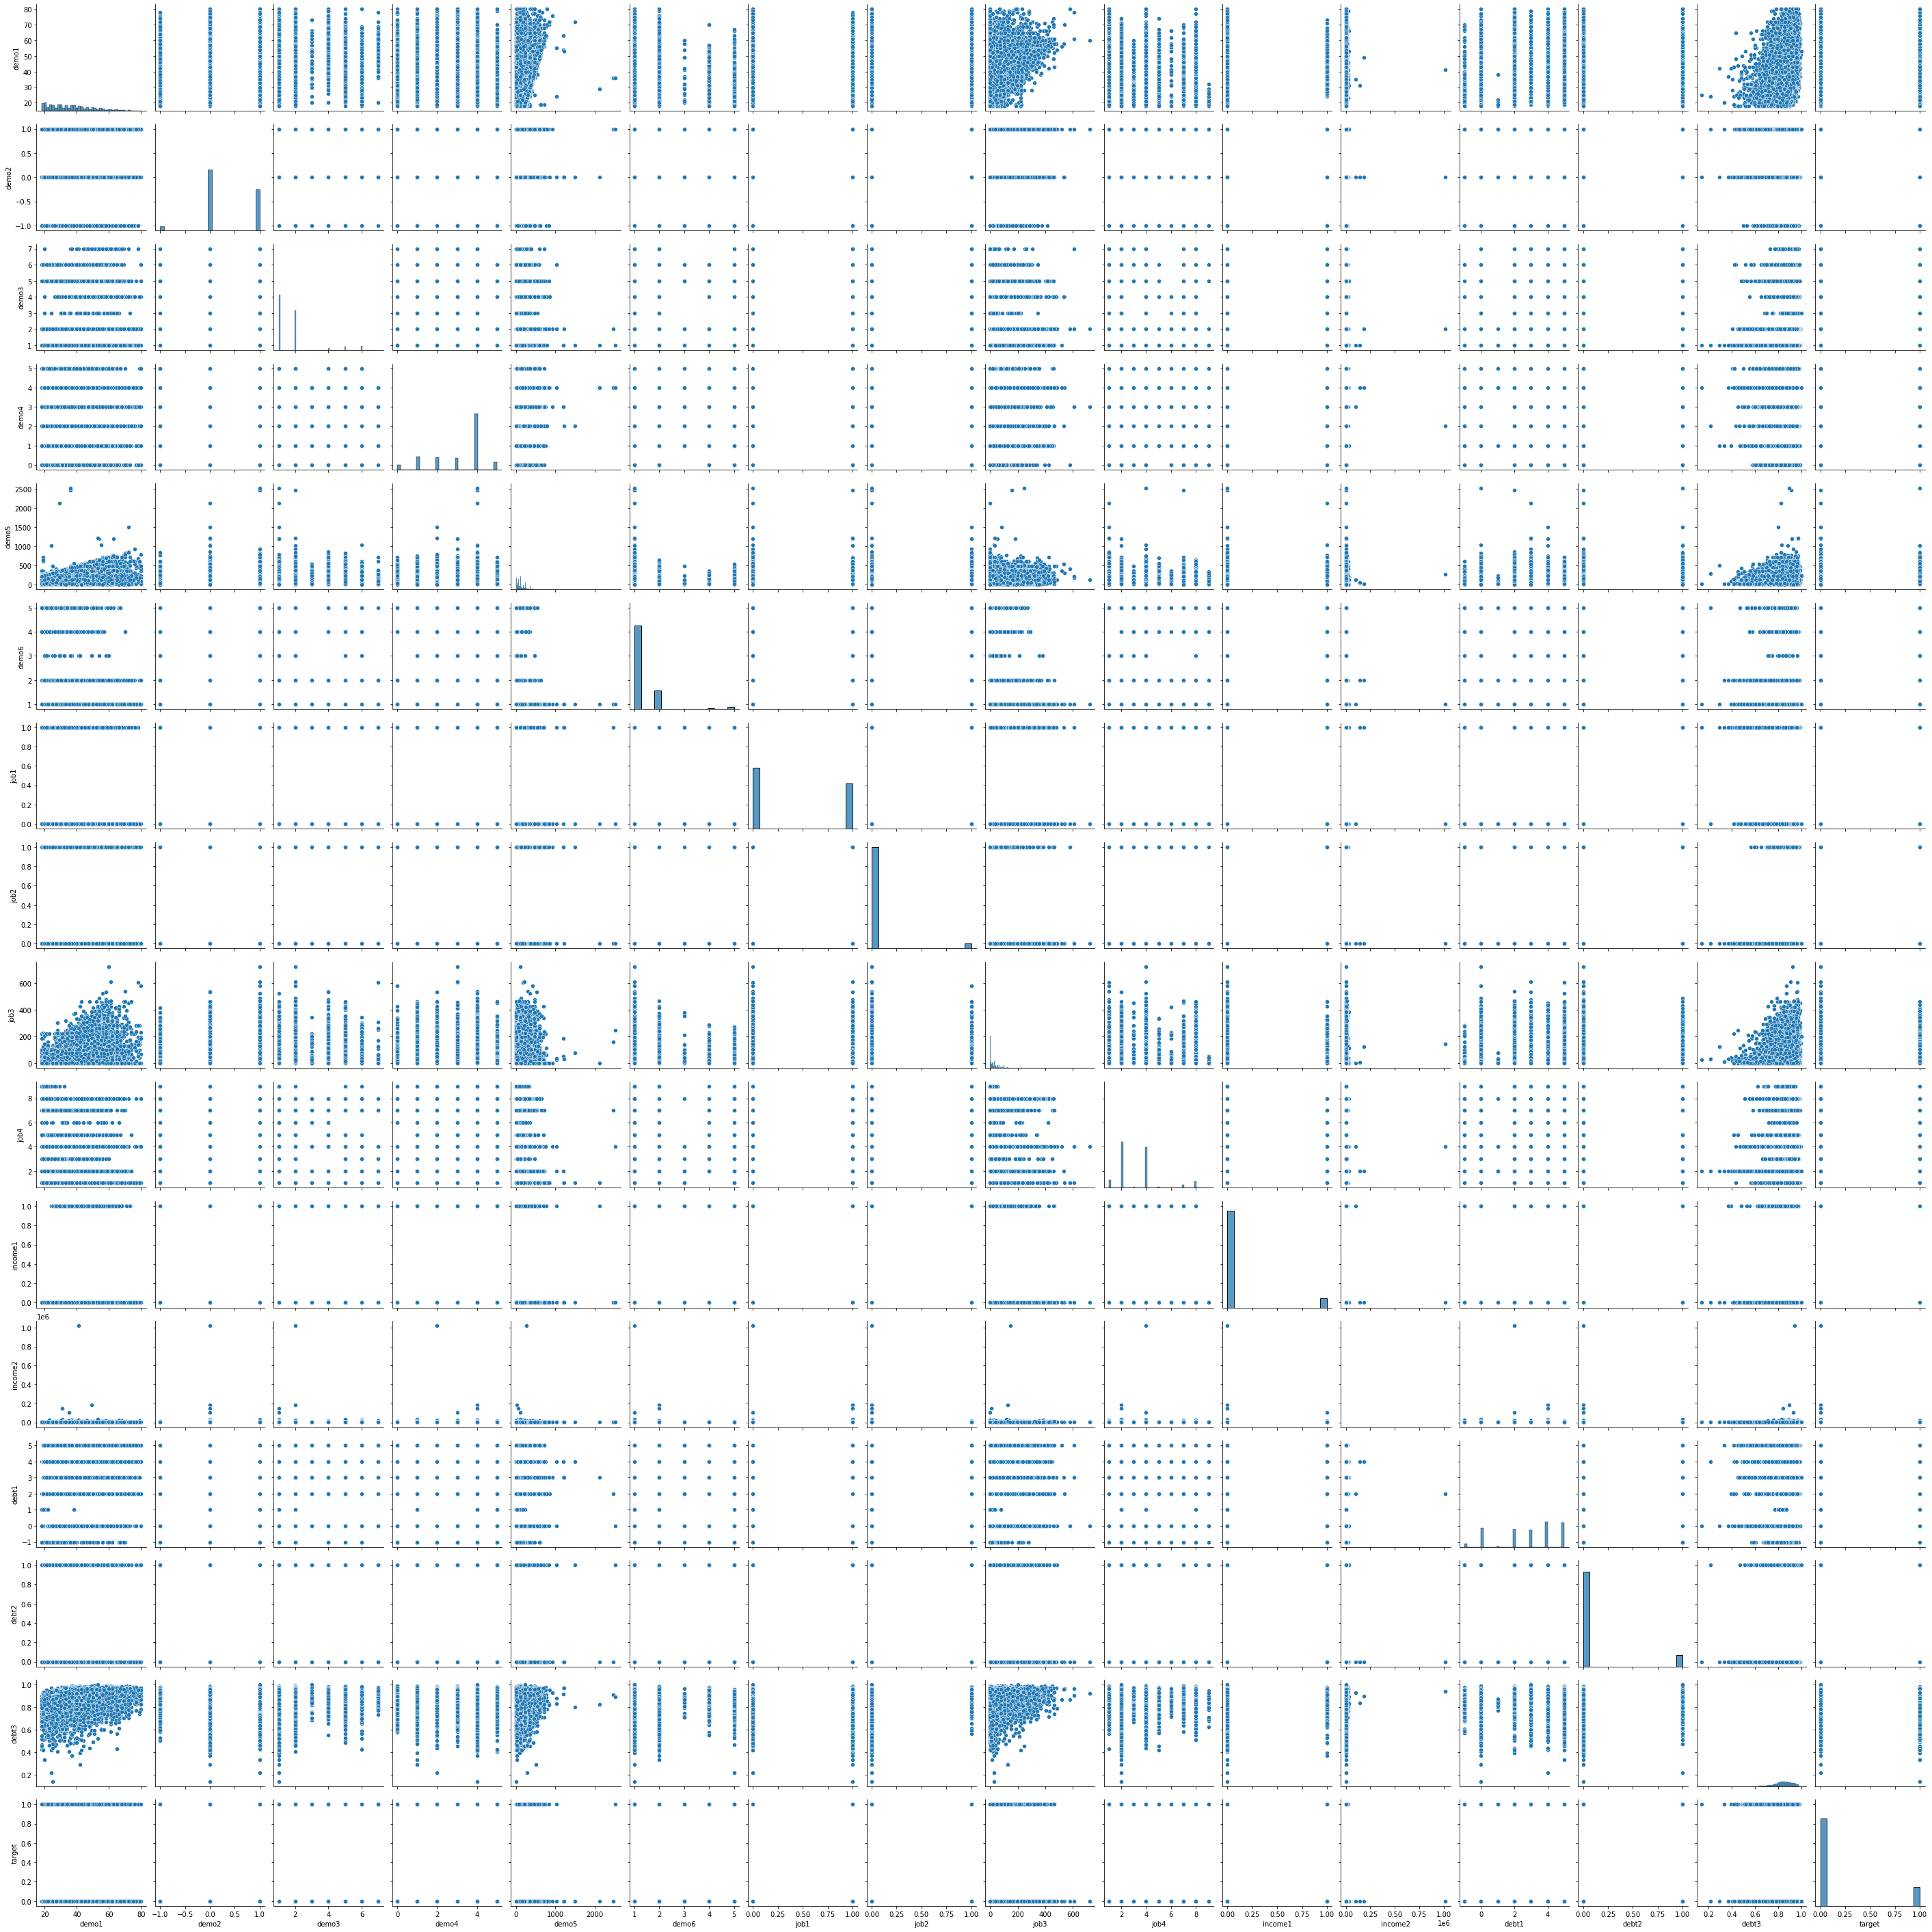

In [16]:
sns.pairplot(data)

## Filtragem de Datasets

> Observação e autoanálise : 
*      Erro Interpretativo Pessoal : o nome das variáveis estão fazendo referência ao mês de Agosto como *X_train* com o 'target' do mês em *y_train*, assim também como o mês de setembro em X_test com seu respectivo Y_test.    Percebi que o conjunto de setembro deve ser utilizada somente quando os modelos já estiverem prontos , para então aferir o desempenho dos mesmos. Logo o test de setembro não é para o treinamento do modelo em agosto e sim após o treinamento.
* Solução: Efetuar a separação e salvar em datasets com a extenção ' .pkl ' para fácil manuseio e reuso. Além disso, utilizar os datasets com seus respectivos nomes referentes ao mês em questão  a saber : *dt_agosto* , *dt_setembro*



* Ler os dados e aplicar um filtro através das mascaras:
  * Dados de Agosto e Setembro

In [17]:
# Definindo máscara para aplicação da filtragem de datas
mask_Agosto = (data['date'] > '2015-08-1') & (data['date'] <= '2015-08-31') 
mask_Setembro =  (data['date'] > '2015-09-1') & (data['date'] <= '2015-09-30') 
# 
dt_agosto = data.loc[mask_Agosto]
#
dt_setembro = data.loc[mask_Setembro]
#
print('X')
print("Minima              Máxima              Tamanho")
print(dt_agosto['date'].min(),dt_agosto['date'].max(),dt_agosto.shape)
print(dt_setembro['date'].min(),dt_setembro['date'].max(),dt_setembro.shape)

X
Minima              Máxima              Tamanho
2015-08-10 2015-08-31 (7646, 17)
2015-09-10 2015-09-30 (3378, 17)


In [18]:
print(dt_agosto.shape,dt_setembro.shape)

(7646, 17) (3378, 17)


* exportando dados para reuso

In [19]:
dt_agosto.to_pickle("/content/drive/MyDrive/Colab Notebooks/UME_ANALISE/dt_agosto.pkl")
dt_setembro.to_pickle("/content/drive/MyDrive/Colab Notebooks/UME_ANALISE/dt_setembro.pkl")

#Ler dados filtrados

In [20]:
dt_agosto = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/UME_ANALISE/dt_agosto.pkl")
dt_setembro =  pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/UME_ANALISE/dt_setembro.pkl")

# Testando Funções de Machine Learning sem Ensembles
* DecisionTree
* Random florest
* KNN

> Os conteúdos absorvidos neste tópico se fazem valer no entendimento da aplicação de cada modelo, desde sua forma de utilizar os dados até as características e regras de composição do mesmo

## Random Florest

In [21]:
from sklearn.model_selection import train_test_split
#
x_train, x_test, y_train, y_test = train_test_split(
    dt_agosto[['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'job1', 'job2','job3', 'job4', 'income1', 'income2', 'debt1', 'debt2', 'debt3']],
    dt_agosto['target'],
    test_size=0.3,random_state=4)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

precision_rfc =[]

for n in range(1,30):
  rfc = RandomForestClassifier(n_estimators=n)
  rfc.fit(x_train, y_train)
  y_pred = rfc.predict(x_test)
  precision_rfc.append(rfc.score(x_test,y_test))

##K-NN

In [23]:
from sklearn.model_selection import train_test_split
#
x_train, x_test, y_train, y_test = train_test_split(
    dt_agosto[['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'job1', 'job2','job3', 'job4', 'income1', 'income2', 'debt1', 'debt2', 'debt3']],
    dt_agosto['target'],
    test_size=0.3,random_state=4)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

precision_knn =[]

for n in range(1,30):
  knn = KNeighborsClassifier(n_neighbors = n)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  precision_knn.append(knn.score(x_test,y_test))


## Decision Tree

In [25]:
from sklearn.model_selection import train_test_split
#
x_train, x_test, y_train, y_test = train_test_split(
    dt_agosto[['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'job1', 'job2','job3', 'job4', 'income1', 'income2', 'debt1', 'debt2', 'debt3']],
    dt_agosto['target'],
    test_size=0.3,random_state=4)

In [26]:
from sklearn.tree import DecisionTreeClassifier

precision_clf =[]

for n in range(1,30):
  clf = DecisionTreeClassifier()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  precision_clf.append(clf.score(x_test,y_test))

## Resultado de testes preliminares

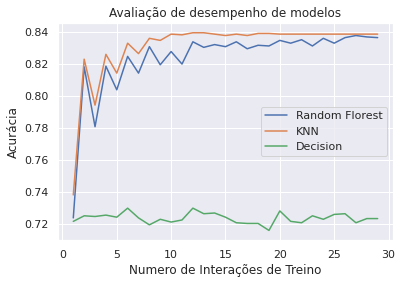

In [27]:
sns.set_theme()

plt.plot(range(1,30), precision_rfc,  label='Random Florest')
plt.plot(range(1,30), precision_knn, label='KNN')
plt.plot(range(1,30), precision_clf, label='Decision')
plt.legend()
plt.title('Avaliação de desempenho de modelos')
plt.ylabel('Acurácia')
plt.xlabel('Numero de Interações de Treino')
plt.show()

# Ensembles

##Bagging


In [28]:
from sklearn.model_selection import train_test_split
#
x_train, x_test, y_train, y_test = train_test_split(
    dt_agosto[['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'job1', 'job2','job3', 'job4', 'income1', 'income2', 'debt1', 'debt2', 'debt3']],
    dt_agosto['target'],
    test_size=0.3,random_state=4)

In [29]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(RandomForestClassifier(), max_samples=1,max_features = 1.0, n_estimators = 20)
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [30]:
bg.score(x_test,y_test)

0.8387096774193549

	Classification
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1924
           1       0.19      0.22      0.21       370

    accuracy                           0.72      2294
   macro avg       0.52      0.52      0.52      2294
weighted avg       0.74      0.72      0.73      2294


	Confusion Matrix


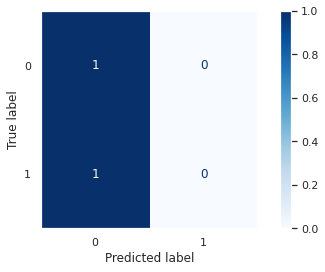

In [31]:
from sklearn.metrics import plot_confusion_matrix

sns.set_theme(style='dark')
print("\tClassification")
print(classification_report(y_test, y_pred))
print("\n\tConfusion Matrix")
fig, ax = plt.subplots(figsize=(8, 4))
plot_confusion_matrix(bg, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()


###Out-of-bag

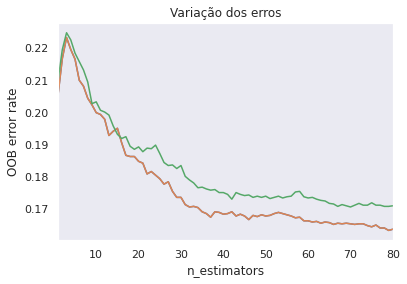

In [32]:
import warnings;
warnings.simplefilter('ignore')
from collections import OrderedDict

from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 1
max_estimators = 80

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.title("Variação dos erros")
plt.show()

	Classification
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1924
           1       0.19      0.22      0.21       370

    accuracy                           0.72      2294
   macro avg       0.52      0.52      0.52      2294
weighted avg       0.74      0.72      0.73      2294


	Confusion Matrix


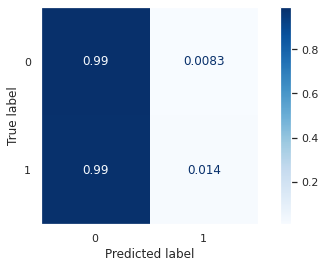

In [33]:
print("\tClassification")
print(classification_report(y_test, y_pred))
print("\n\tConfusion Matrix")
fig, ax = plt.subplots(figsize=(8, 4))
plot_confusion_matrix(clf, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

##Boosting -Ada Boost

In [34]:
from sklearn.model_selection import train_test_split
#
x_train, x_test, y_train, y_test = train_test_split(
    dt_agosto[['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'job1', 'job2','job3', 'job4', 'income1', 'income2', 'debt1', 'debt2', 'debt3']],
    dt_agosto['target'],
    test_size=0.3,random_state=4)

In [35]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(RandomForestClassifier(),n_estimators =100, learning_rate = 2,random_state=0)
adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [36]:
round(adb.score(x_test,y_test),2)

0.84

	Classification
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1924
           1       0.19      0.22      0.21       370

    accuracy                           0.72      2294
   macro avg       0.52      0.52      0.52      2294
weighted avg       0.74      0.72      0.73      2294


	Confusion Matrix


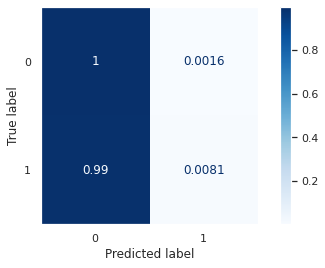

In [37]:
print("\tClassification")
print(classification_report(y_test, y_pred))
print("\n\tConfusion Matrix")
fig, ax = plt.subplots(figsize=(8, 4))
plot_confusion_matrix(adb, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()


##Voting Classifier - Multiple Model Ensemble

In [38]:
from sklearn.model_selection import train_test_split
#
x_train, x_test, y_train, y_test = train_test_split(
    dt_agosto[['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'job1', 'job2','job3', 'job4', 'income1', 'income2', 'debt1', 'debt2', 'debt3']],
    dt_agosto['target'],
    test_size=0.3,random_state=4)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel = 'poly', degree = 2 )

In [40]:
evc = VotingClassifier( estimators=[('lr',lr),('dt',dt),('svm',svm)], voting = 'hard')

In [41]:
evc.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [42]:
evc.score(x_test, y_test)

0.8387096774193549

	Classification
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1924
           1       0.19      0.22      0.21       370

    accuracy                           0.72      2294
   macro avg       0.52      0.52      0.52      2294
weighted avg       0.74      0.72      0.73      2294


	Confusion Matrix


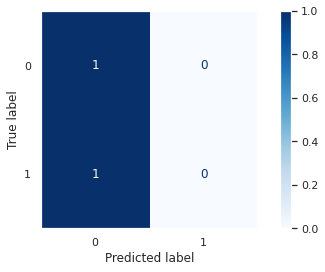

In [43]:

print("\tClassification")
print(classification_report(y_test, y_pred))
print("\n\tConfusion Matrix")
fig, ax = plt.subplots(figsize=(8, 4))
plot_confusion_matrix(evc, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

##Voting Classifier 2

In [44]:
from sklearn.model_selection import train_test_split
#
x_train, x_test, y_train, y_test = train_test_split(
    dt_agosto[['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'job1', 'job2','job3', 'job4', 'income1', 'income2', 'debt1', 'debt2', 'debt3']],
    dt_agosto['target'],
    test_size=0.3,random_state=4)

In [45]:
from sklearn.ensemble import VotingClassifier

evc2 = VotingClassifier( estimators=[('rfc',rfc),('knn',knn),('clf',clf)], voting = 'soft')
evc2.fit(x_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
       

In [46]:
evc2.score(x_test, y_test)

0.8382737576285963

	Classification
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1924
           1       0.19      0.22      0.21       370

    accuracy                           0.72      2294
   macro avg       0.52      0.52      0.52      2294
weighted avg       0.74      0.72      0.73      2294


	Confusion Matrix


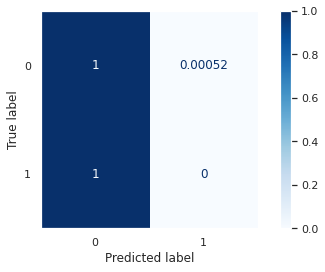

In [47]:
print("\tClassification")
print(classification_report(y_test, y_pred))
print("\n\tConfusion Matrix")
fig, ax = plt.subplots(figsize=(8, 4))
plot_confusion_matrix(evc2, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

#Desempenho de Ensembles

In [48]:
dt_setembro.head()

,date,demo1,demo2,demo3,demo4,demo5,demo6,job1,job2,job3,job4,income1,income2,debt1,debt2,debt3,target
10002,2015-09-15,26,0,1,4,120,1,0,0,15,2,0,1551.75,-1,0,0.8397,0
10004,2015-09-14,21,-1,1,4,150,1,0,1,0,4,0,1551.75,5,0,0.8464,1
10005,2015-09-10,19,-1,1,3,74,1,0,0,6,2,0,1137.95,-1,0,0.8212,1
10007,2015-09-10,49,0,1,0,72,1,0,0,330,4,0,3103.50,0,1,0.7317,0
10008,2015-09-10,32,0,2,3,48,1,1,0,8,2,0,1551.75,4,0,0.5036,1


In [49]:
dt_setembro.iloc[1:2,1:-1]

,demo1,demo2,demo3,demo4,demo5,demo6,job1,job2,job3,job4,income1,income2,debt1,debt2,debt3
10004,21,-1,1,4,150,1,0,1,0,4,0,1551.75,5,0,0.8464


In [50]:
bg.predict(dt_setembro.iloc[1:2,1:-1])

array([0])

In [51]:
bg.score(dt_setembro.iloc[:,1:-1],dt_setembro['target'])

0.8040260509177027

In [52]:
adb.predict(dt_setembro.iloc[1:2,1:-1])

array([0])

In [53]:
adb.score(dt_setembro.iloc[:,1:-1],dt_setembro['target'])

0.8043220840734162

# Testando Normalização de Dados e aplicação de cross validation

In [54]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

values = dt_agosto.iloc[:,1:].values
imputer = SimpleImputer()

In [55]:
imputedData = imputer.fit_transform(values)

In [56]:
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(imputedData)

In [57]:
normalizedData.shape

(7646, 16)

In [58]:
X = normalizedData[:,0:15]
Y = normalizedData[:,15]

In [59]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=n, random_state=7)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.833385977249882


In [60]:
model.fit(X,Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,



	Confusion Matrix


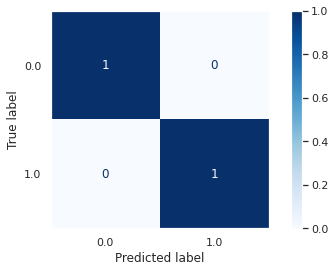

In [61]:
print("\n\tConfusion Matrix")
fig, ax = plt.subplots(figsize=(8, 4))
plot_confusion_matrix(model, X, Y, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()